**Информация по датасету:**

RowNumber: Порядковый номер строки. (не понадобится)

CustomerId: Уникальный идентификатор клиента.

Surname: Фамилия клиента.

CreditScore: Кредитный рейтинг клиента.

Geography: Географическое расположение клиента.

Gender: Пол клиента.

Age: Возраст клиента.

Tenure: Срок обслуживания клиента в банке (в годах).

Balance: Баланс на счете клиента.

NumOfProducts: Количество продуктов банка, которыми пользуется клиент.

HasCrCard: Наличие у клиента кредитной карты.

IsActiveMember: Указывает, является ли клиент активным участником банка.

EstimatedSalary: Оценочная заработная плата клиента.

Exited: Указывает, ушел ли клиент (целевая переменная).

In [ ]:
import pandas as pd
data = pd.read_csv('Churn_Modelling.csv')

In [ ]:
try:
    import scikeras
except ImportError:
    !python -m pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 84.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


In [ ]:
dataset = data.copy()

del dataset['RowNumber']

In [ ]:
del dataset['Gender']
del dataset['Surname']
del dataset['Geography']

In [ ]:
dataset.sample(10)

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9848,15762708,619,38,10,119658.49,1,1,1,8646.58,0
8748,15673971,655,44,6,146498.76,1,1,0,64853.51,1
1994,15666055,705,49,7,0.00,1,1,0,63405.20,1
4250,15631359,489,38,5,117289.92,1,0,0,85231.88,0
9440,15584156,593,27,10,0.00,3,0,0,94620.00,1
1154,15766887,538,39,2,122773.50,2,1,1,58467.08,0
6038,15700964,624,27,7,104848.68,1,1,1,167387.36,0
7512,15631267,641,50,6,153590.73,2,1,1,130910.78,0
1298,15572360,683,30,10,57657.49,1,0,0,79240.90,0
9173,15653572,673,43,8,127132.96,1,0,1,6009.27,1


In [ ]:
dataset['Tenure'].unique() # проверка уникальности

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [ ]:
dataset.info() # убеждаемся в отсутствии null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 781.4 KB


In [ ]:
del dataset['CustomerId']

In [ ]:
corr_matrix = dataset.corr()

print(corr_matrix['Exited'].round(3).sort_values(ascending=False))

Exited             1.000
Age                0.285
Balance            0.119
EstimatedSalary    0.012
HasCrCard         -0.007
Tenure            -0.014
CreditScore       -0.027
NumOfProducts     -0.048
IsActiveMember    -0.156
Name: Exited, dtype: float64


array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>],
       [<Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>]], dtype=object)

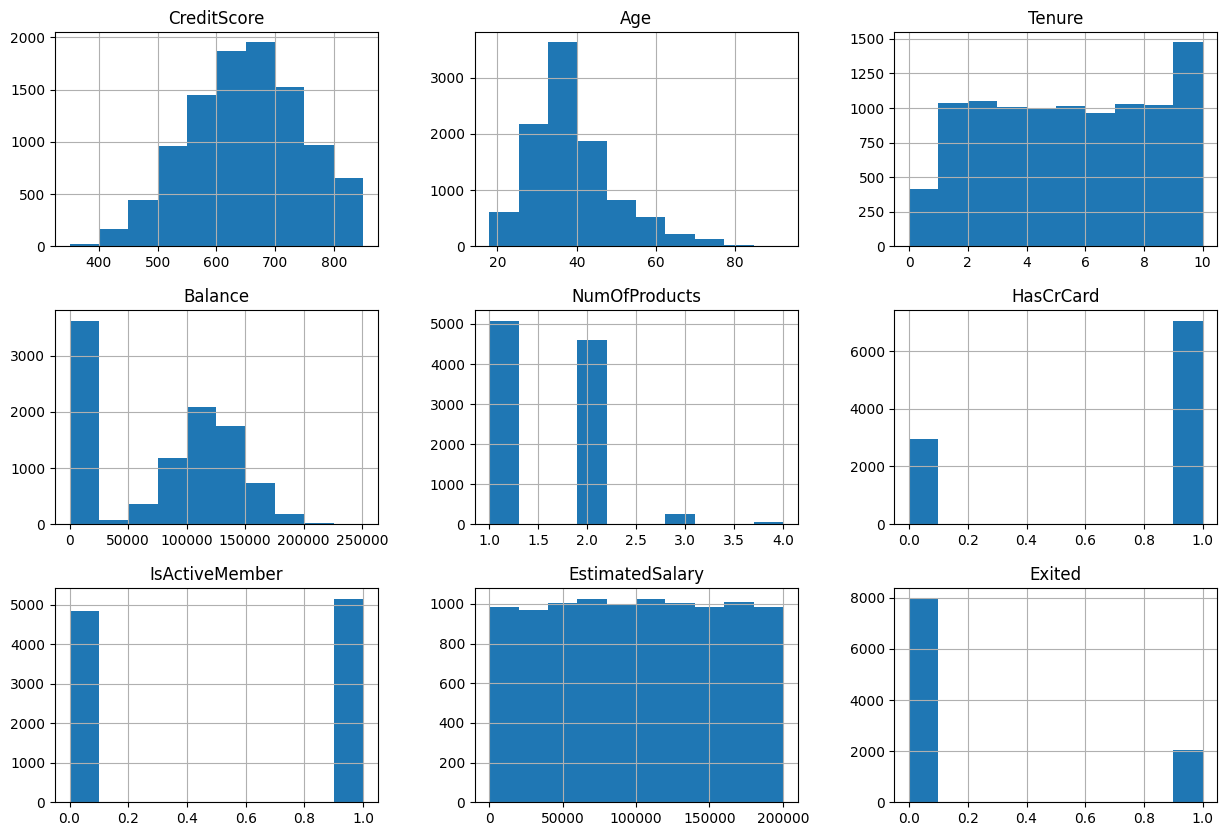

In [ ]:
dataset.hist(figsize=(15, 10))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import xgboost as xgb

In [ ]:
points = dataset['Exited']
values = dataset.drop(['Exited'], axis = 1)

train_points, test_points, train_values, test_values = train_test_split(values, points, test_size = 0.2)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#train_values = le.fit_transform(train_values)

model = xgb.XGBClassifier()
model.fit(train_points, train_values)
predictions = model.predict(test_points)
accuracy = accuracy_score(test_values, predictions)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(test_values, predictions))

Accuracy: 0.844

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1592
           1       0.69      0.42      0.53       408

    accuracy                           0.84      2000
   macro avg       0.78      0.69      0.72      2000
weighted avg       0.83      0.84      0.83      2000



In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
scaler.fit(train_points)

train_points_scaled = scaler.transform(train_points)
test_points_scaled = scaler.transform(test_points)

model = xgb.XGBClassifier()
model.fit(train_points_scaled, train_values)
predictions = model.predict(test_points_scaled)
accuracy = accuracy_score(test_values, predictions)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(test_values, predictions))

Accuracy: 0.844

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1592
           1       0.69      0.42      0.53       408

    accuracy                           0.84      2000
   macro avg       0.78      0.69      0.72      2000
weighted avg       0.83      0.84      0.83      2000

